In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import cupy as cp
from scipy.ndimage import gaussian_filter


In [2]:
img = cv2.imread('sample11.jpg') 
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)

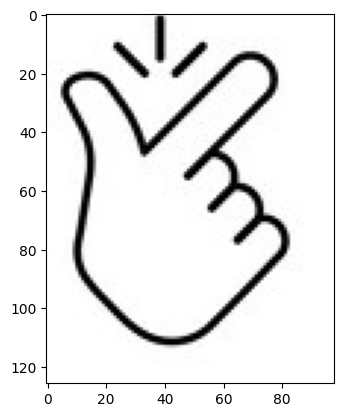

In [3]:
plt.imshow(img)

In [4]:
def hessian_matrix(x, y, img, sigma=1):
    Dxx = gaussian_filter(img, sigma=sigma, order=(2, 0))
    Dyy = gaussian_filter(img, sigma=sigma, order=(0, 2))
    Dxy = gaussian_filter(img, sigma=sigma, order=(1, 1))
    return Dxx[x, y], Dyy[x, y], Dxy[x, y]

def hessian_determinant(x, y, img, sigma=1.5):
    Dxx, Dyy, Dxy = hessian_matrix(x, y, img, sigma)
    return (Dxx * Dyy) - (0.9 * Dxy ** 2)  # Use 0.9 to approximate SURF's box filter


In [5]:
def detect_keypoints(img, threshold=30):
    keypoints = []
    for x in range(1, img.shape[0] - 1):
        for y in range(1, img.shape[1] - 1):
            print(x,y)
            det = hessian_determinant(x, y, img)
            print(det)
            if det > threshold:
                keypoints.append((x, y))
                print(keypoints)
    return keypoints


In [6]:
def assign_orientation(img, keypoints, window_size=3):
    orientations = []
    for (x, y) in keypoints:
        gx = img[x + 1, y] - img[x - 1, y]
        gy = img[x, y + 1] - img[x, y - 1]
        orientation = np.arctan2(gy, gx)
        orientations.append(orientation)
    return orientations


In [7]:
def generate_descriptors(img, keypoints, orientations, size=4):
    descriptors = []
    for i, (x, y) in enumerate(keypoints):
        angle = orientations[i]
        descriptor = []
        for dx in range(-size, size):
            for dy in range(-size, size):
                # Rotate around keypoint
                nx = int(x + dx * np.cos(angle) - dy * np.sin(angle))
                ny = int(y + dx * np.sin(angle) + dy * np.cos(angle))
                
                # Ensure indices are within bounds
                if 0 <= nx < img.shape[0] and 0 <= ny < img.shape[1]:
                    gx = img[nx + 1, ny] - img[nx - 1, ny]
                    gy = img[nx, ny + 1] - img[nx, ny - 1]
                    descriptor.append(gx)
                    descriptor.append(gy)
        
        descriptors.append(np.array(descriptor))
    return descriptors


In [8]:
keypoints=detect_keypoints(img_gray)

1 1
0.0006009036442264915
1 2
0.0006009036442264915
1 3
0.0006009036442264915
1 4
0.0006009036442264915
1 5
0.0006009036442264915
1 6
0.0006009036442264915
1 7
0.0006009036442264915
1 8
0.0006009036442264915
1 9
0.0006009036442264915
1 10
0.0006009036442264915
1 11
0.0006009036442264915
1 12
0.0006009036442264915
1 13
0.0006009036442264915
1 14
0.0006009036442264915
1 15
0.0006009036442264915
1 16
0.0006009036442264915
1 17
0.0006009036442264915
1 18
0.0006009036442264915
1 19
0.0006009036442264915
1 20
0.0006009036442264915
1 21
0.0006009036442264915
1 22
0.0006009036442264915
1 23
0.0006009036442264915
1 24
0.0006009036442264915
1 25
0.0006009036442264915
1 26
0.0006230649825886183
1 27
0.0008074515901887312
1 28
0.0016107260090934973
1 29
0.0027152747864356975
1 30
-0.0010617197626899832
1 31
-0.010676856560497378
1 32
-0.0035771067049850612
1 33
-0.08504867468780838
1 34
-1.861497648355817
1 35
-13.667845851910922
1 36
-49.3091019028856
1 37
-97.26469049492299
1 38
-125.56063922573

In [9]:
print(keypoints)

[(2, 37), (2, 38), (2, 39), (3, 37), (3, 38), (3, 39), (3, 40), (4, 37), (4, 38), (4, 39), (5, 38), (5, 39), (10, 24), (10, 25), (10, 52), (10, 53), (11, 23), (11, 24), (11, 25), (11, 26), (11, 51), (11, 52), (11, 53), (11, 54), (12, 23), (12, 24), (12, 25), (12, 26), (12, 27), (12, 37), (12, 38), (12, 39), (12, 50), (12, 51), (12, 52), (12, 53), (13, 24), (13, 25), (13, 26), (13, 27), (13, 37), (13, 38), (13, 39), (13, 40), (13, 50), (13, 51), (13, 52), (13, 67), (13, 68), (13, 69), (13, 70), (13, 71), (13, 72), (14, 26), (14, 27), (14, 28), (14, 37), (14, 38), (14, 39), (14, 44), (14, 49), (14, 50), (14, 51), (14, 64), (14, 65), (14, 66), (14, 67), (14, 68), (14, 70), (14, 71), (14, 72), (14, 73), (14, 74), (15, 27), (15, 28), (15, 29), (15, 33), (15, 38), (15, 39), (15, 43), (15, 44), (15, 48), (15, 49), (15, 63), (15, 64), (15, 65), (15, 73), (15, 74), (15, 75), (16, 28), (16, 29), (16, 30), (16, 47), (16, 48), (16, 49), (16, 62), (16, 63), (16, 64), (16, 74), (16, 75), (16, 76), (

In [10]:
orientations= assign_orientation(img_gray,keypoints)

In [11]:
descriptors = generate_descriptors(img_gray, keypoints, orientations)

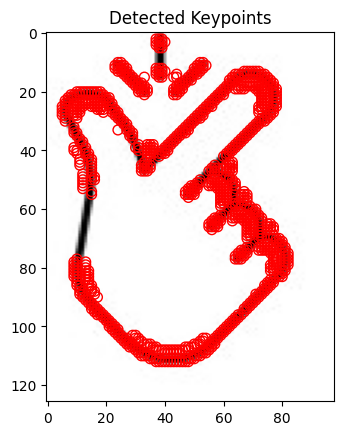

In [12]:
# Plot keypoints
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
for (x, y) in keypoints:
    # plt.plot(y, x, 'ro')
    plt.scatter(y, x, s=50, facecolors='none', edgecolors='r')  # s is the size of the circle
plt.title('Detected Keypoints')
plt.show()
